# Análise exploratória dos dados de vacinação do Open DataSUS no estado do Amazonas

https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-08-13/uf%3DAM/part-00000-5b9bd6ae-e55b-4511-a642-9cb53982adeb.c000.csv

In [1]:
# Criando pasta para armazenar no GDrive o dataset
!mkdir -p '/content/drive/MyDrive/Datasets/vacinacao-covid-AM'

In [2]:
# Baixando o dataset para o GDrive
!wget -P '/content/drive/MyDrive/Datasets/vacinacao-covid-AM' https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-08-13/uf%3DAM/part-00000-5b9bd6ae-e55b-4511-a642-9cb53982adeb.c000.csv

--2021-08-17 02:25:14--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-08-13/uf%3DAM/part-00000-5b9bd6ae-e55b-4511-a642-9cb53982adeb.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.164.18
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.164.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1309220843 (1.2G) [text/csv]
Saving to: ‘/content/drive/MyDrive/Datasets/vacinacao-covid-AM/part-00000-5b9bd6ae-e55b-4511-a642-9cb53982adeb.c000.csv.2’

part-00000-5b9bd6ae 100%[===================>]   1.22G  10.1MB/s    in 2m 7s   

2021-08-17 02:27:22 (9.83 MB/s) - ‘/content/drive/MyDrive/Datasets/vacinacao-covid-AM/part-00000-5b9bd6ae-e55b-4511-a642-9cb53982adeb.c000.csv.2’ saved [1309220843/1309220843]



In [3]:
# Preparando o ambiente com a bibliotecas 
import pandas as pd
import seaborn as sns


In [4]:
sns.set()

In [5]:
# Lendo o arquivo csv
vacinacao_AM = pd.read_csv('/content/drive/MyDrive/Datasets/vacinacao-covid-AM/part-00000-5b9bd6ae-e55b-4511-a642-9cb53982adeb.c000.csv', sep=';')

In [6]:
# Primeiras linhas
vacinacao_AM.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,c981c4e7-a9ce-4d7a-9fa7-b17ae8d15056-i0b0,fc5058367b9b51586c8d4432a6fe554ff6340a39b0230e...,20.0,2001-04-25,F,3.0,PARDA,130185.0,10.0,IRANDUBA,BRASIL,AM,69415.0,B,2012839,PREFEITURA MUNICIPAL DE IRANDUBA,UNIDADE HOSPITALAR DE IRANDUBA,130185,IRANDUBA,AM,602,Ribeirinha,6.0,Povos e Comunidades Tradicionais,212VCD001ZVB,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-01,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-03T16:26:26.000Z,16341
1,76f586e4-4c0f-4c79-9d30-69a4648706e9-i0b0,731fbdfb73b9cce17c86243d9c53ff3c4004646dfecc39...,59.0,1961-06-21,F,3.0,PARDA,130255.0,10.0,MANAQUIRI,BRASIL,AM,69435.0,B,5501369,PREFEITURA MUNICIPAL DE MANAQUIRI,UNIDADE BASIC A DE SAUDE AGASSIS VIEIRA SOUTO,130255,MANAQUIRI,AM,602,Ribeirinha,6.0,Povos e Comunidades Tradicionais,212VCD001ZVB,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-23,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-08-04T15:30:55.000Z,16341
2,4109b347-3308-461d-9a58-67e41568c52a-i0b0,736843e742b1dc11255a45740607f097eee61b7f94115e...,45.0,1975-09-12,M,2.0,PRETA,110020.0,10.0,PORTO VELHO,BRASIL,RO,76802.0,B,3818683,PREFEITURA MUNICIPAL DE SANTA ISABEL DO RIO NEGRO,UNIDADE BASICA DE SAUDE TAPURUQUARA,130360,SANTA ISABEL DO RIO NEGRO,AM,111,Outros Imunocomprometidos,1.0,Comorbidades,210012,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-01,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-06-29T14:47:28.000Z,16341
3,9a71fba5-db04-4a89-91a5-699e0941b0b9-i0b0,89f40db913644633356583f17e04954d9ca69dde40f05c...,41.0,1980-03-03,F,3.0,PARDA,130260.0,10.0,MANAUS,BRASIL,AM,NaN,B,2013916,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF DR ALFREDO CAMPOS,130260,MANAUS,AM,107,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,EX2405,BioNTech/Fosun Pharma/Pfizer,NaN,2021-06-15,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,SMV,2021-06-17T01:06:00.000Z,18183
4,e8cb64ae-3754-4e61-a738-4f42a501fee2-i0b0,6574221f3dba2240341fa5fdc0112cc3fcd3d7c6a0ae83...,40.0,1981-04-03,M,99.0,SEM INFORMACAO,130260.0,10.0,MANAUS,BRASIL,AM,69047.0,B,2011956,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF REDENCAO,130260,MANAUS,AM,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,215VCD141W,University of Oxford/AstraZeneca,NaN,2021-06-13,1ª Dose,85,Vacina Covid-19 - Covishield,SMV,2021-06-15T17:52:48.000Z,18183


In [7]:
# Olhando as colunas
vacinacao_AM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520461 entries, 0 to 2520460
Data columns (total 34 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_datanascimento                   object 
 4   paciente_enumsexobiologico                object 
 5   paciente_racacor_codigo                   float64
 6   paciente_racacor_valor                    object 
 7   paciente_endereco_coibgemunicipio         float64
 8   paciente_endereco_copais                  float64
 9   paciente_endereco_nmmunicipio             object 
 10  paciente_endereco_nmpais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     float64
 13  paciente_nacionalidade_enumnacionalidade  object 
 14  es

In [8]:
# Percentual de vacinadas por cor
vacinacao_AM.paciente_racacor_valor.value_counts(normalize=True)

PARDA             0.479507
SEM INFORMACAO    0.203915
AMARELA           0.189700
BRANCA            0.077110
INDIGENA          0.039244
PRETA             0.010524
Name: paciente_racacor_valor, dtype: float64

In [9]:
# Quais estabelecimentos aplicaram mais a vacinação neste estado
vacinacao_AM.estabelecimento_razaosocial.value_counts(normalize=False)

MANAUS SECRETARIA MUNICIPAL DE SAUDE         1554609
PREFEITURA MUNICIPAL DE PARINTINS              57206
PREFEITURA MUNICIPAL DE ITACOATIARA            56333
MUNICIPIO DE MANACAPURU                        51254
MINISTERIO DA SAUDE                            39003
                                              ...   
MUNICIPIO DE SAO PAULO DE OLIVENCA                33
PREFEITURA MUNICIPAL DE AMATURA                   27
FUNDO MUNICIPAL DE SAUDE DE ITACOATIARA           26
MUNICIPIO DE GUAJARA                              23
PREFEITURA MUNICIPAL DE SAUDE DE IRANDUBA          4
Name: estabelecimento_razaosocial, Length: 138, dtype: int64

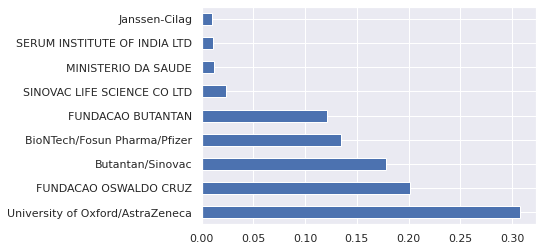

In [10]:
# Os fabricantes e seus percentuais de aplicação

vacinacao_AM.vacina_fabricante_nome.value_counts(normalize=True).plot(kind='barh');

In [11]:
# Idade x Grupo prioritário
vacinacao_AM.groupby(['paciente_idade', 'vacina_grupoatendimento_nome']).count()

document_id  ...  id_sistema_origem
paciente_idade vacina_grupoatendimento_nome                      ...                   
0.0            Enfermeiro(a)                                  1  ...                  1
               Outros                                         1  ...                  1
               Pessoas de 18 a 64 anos                        1  ...                  1
               População Privada de Liberdade                 2  ...                  2
               Povos indígenas em terras indígenas            3  ...                  3
...                                                         ...  ...                ...
121.0          Técnico de Enfermagem                          3  ...                  3
124.0          Pessoas de 18 a 64 anos                        3  ...                  3
126.0          Pessoas de 80 anos ou mais                     1  ...                  1
127.0          Pessoas de 80 anos ou mais                     1  ...                  1
128.0          Pessoas de 18 a 64 anos                        1  ...                  1

[4575 rows x 32 columns]

In [12]:
# Describe
vacinacao_AM.describe(include='all')

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
count,2520461,2520447,2.520447e+06,2520447,2520447,2.520447e+06,2520447,2.499281e+06,2.499384e+06,2499341,2499384,2499281,2.111267e+06,2519481,2.520461e+06,2520461,2520461,2.520461e+06,2520461,2520461,2.520461e+06,2500348,2.500348e+06,2500335,2520461,2520461,843327,2520461,2520461,2.520461e+06,2520461,2520461,2520461,2.520461e+06
unique,2520461,1909210,NaN,29963,2,NaN,6,NaN,NaN,3192,10,28,NaN,3,NaN,138,487,NaN,62,1,NaN,92,NaN,20,551,9,3,210,4,NaN,5,3,731432,NaN
top,69fcc62e-8818-4b9f-b3e2-67516ae36df0-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,NaN,1985-01-01,F,NaN,PARDA,NaN,NaN,MANAUS,BRASIL,AM,NaN,B,NaN,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF MANSOUR BULBOL,NaN,MANAUS,AM,NaN,Pessoas de 18 a 64 anos,NaN,Faixa Etária,215VCD141W,University of Oxford/AstraZeneca,Organization/33781055000135,2021-06-13,1ª Dose,NaN,Vacina Covid-19 - Covishield,SMV,2021-06-21T02:32:23.000Z,NaN
freq,1,8,NaN,228,1330884,NaN,1208572,NaN,NaN,1504384,2499323,2376452,NaN,2493376,NaN,1554609,415390,NaN,1595892,2520461,NaN,1200773,NaN,1561467,209263,776439,508515,80641,1863924,NaN,1343399,1588699,24749,NaN
mean,NaN,NaN,4.454898e+01,NaN,NaN,2.267932e+01,NaN,1.348658e+05,1.000345e+01,NaN,NaN,NaN,6.879817e+04,NaN,2.772728e+06,NaN,NaN,1.302488e+05,NaN,NaN,2.092037e+03,NaN,3.884027e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.564970e+01,NaN,NaN,NaN,1.758138e+04
std,NaN,NaN,1.723345e+01,NaN,NaN,3.863515e+01,NaN,3.393903e+04,7.877685e-01,NaN,NaN,NaN,5.332104e+03,NaN,1.718144e+06,NaN,NaN,7.858426e+01,NaN,NaN,4.157957e+04,NaN,6.338601e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.115824e-01,NaN,NaN,NaN,8.828794e+02
min,NaN,NaN,0.000000e+00,NaN,NaN,1.000000e+00,NaN,1.100010e+05,1.000000e+01,NaN,NaN,NaN,0.000000e+00,NaN,7.089000e+04,NaN,NaN,1.300020e+05,NaN,NaN,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.500000e+01,NaN,NaN,NaN,1.634100e+04
25%,NaN,NaN,3.000000e+01,NaN,NaN,3.000000e+00,NaN,1.302600e+05,1.000000e+01,NaN,NaN,NaN,6.905300e+04,NaN,2.013916e+06,NaN,NaN,1.302600e+05,NaN,NaN,2.010000e+02,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.500000e+01,NaN,NaN,NaN,1.634100e+04
50%,NaN,NaN,4.200000e+01,NaN,NaN,3.000000e+00,NaN,1.302600e+05,1.000000e+01,NaN,NaN,NaN,6.909200e+04,NaN,2.015323e+06,NaN,NaN,1.302600e+05,NaN,NaN,2.010000e+02,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.500000e+01,NaN,NaN,NaN,1.818300e+04
75%,NaN,NaN,5.800000e+01,NaN,NaN,4.000000e+00,NaN,1.302600e+05,1.000000e+01,NaN,NaN,NaN,6.928000e+04,NaN,2.018098e+06,NaN,NaN,1.302600e+05,NaN,NaN,6.020000e+02,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,8.600000e+01,NaN,NaN,NaN,1.818300e+04


In [13]:
# Outliers
# Idade 0

vacinacao_AM[vacinacao_AM.paciente_idade == 0]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
784208,0197736b-5f3e-4eea-a4bd-580a53d740e1-i0b0,e4d9acdfea66fa211fc8dc2755ea4d39db4e3aabbbff10...,0.0,2021-04-28,M,5.0,INDIGENA,130350.0,10.0,PAUINI,BRASIL,AM,69860.0,B,7756240,UNIDADE DE ATENCAO A SAUDE INDIGENA,POLO BASE DE SAUDE INDIGINA DE PAUINI,130350,PAUINI,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-28,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-05-28T14:57:09.000Z,16341
834745,7ed2d798-277b-4b41-9972-bd3b1b2f7749-i0b0,79847f654461296e4404ce7a8351245561804f09f22fec...,0.0,2020-10-29,F,99.0,SEM INFORMACAO,411950.0,10.0,PIRAQUARA,BRASIL,PR,83312.0,B,2013886,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF MJ PM SALVIO BELOTA,130260,MANAUS,AM,1501,População Privada de Liberdade,15.0,População Privada de Liberdade,210277,Butantan/Sinovac,NaN,2021-07-22,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,SMV,2021-07-25T23:38:26.000Z,18183
899701,b6210a5e-c6e8-49e2-903f-71dcaaecfa90-i0b0,3e4ca17fec06685e3259153c1556759991f8cdd0dc33b9...,0.0,2021-03-08,F,3.0,PARDA,130420.0,10.0,TEFE,BRASIL,AM,NaN,B,6817564,PREFEITURA MUNICIPAL DE TEFE,UNIDADE BASICA DE SAUDE LOURIVAL PIRES,130420,TEFE,AM,0,NaN,NaN,NaN,200278,SERUM INSTITUTE OF INDIA LTD,NaN,2021-03-08,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-18T12:45:03.000Z,18602
1118769,0c10b907-6933-4652-b6d7-7a31f229a551-i0b0,8a7e8375b36be41d429a5f7ecb02edd827de4dd9e27e38...,0.0,2020-10-04,M,3.0,PARDA,130250.0,10.0,MANACAPURU,BRASIL,AM,69400.0,B,2013223,MUNICIPIO DE MANACAPURU,UBS GASPAR FERNANDES,130250,MANACAPURU,AM,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,213VCD042Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-07-01,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-07-02T14:40:19.000Z,16341
1842478,1bb0362a-1f39-4bc5-8b1d-1c054c2a0682-i0b0,144bed51039c937527b89c2cd943a0827b82b795b3c0ac...,0.0,2021-04-01,M,99.0,SEM INFORMACAO,130120.0,10.0,COARI,BRASIL,AM,NaN,B,2717328,PREFEITURA MUNICIPAL DE COARI,UNIDADE BASICA DE SAUDE MARIA FERNANDES DANTAS,130120,COARI,AM,926,Outros,9.0,Trabalhadores de Saúde,214VCD070W,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-07-22,1ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-07-24T10:00:23.000Z,18602
2091144,93199867-3df0-417e-9e19-3f6d60ec7245-i0b0,3e4ca17fec06685e3259153c1556759991f8cdd0dc33b9...,0.0,2021-03-08,F,3.0,PARDA,130420.0,10.0,TEFE,BRASIL,AM,NaN,B,6817564,PREFEITURA MUNICIPAL DE TEFE,UNIDADE BASICA DE SAUDE LOURIVAL PIRES,130420,TEFE,AM,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,202010028,SERUM INSTITUTE OF INDIA LTD,NaN,2021-04-06,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-04-08T10:00:02.000Z,18602
2164808,5c5f0a4e-f776-4ca4-92bd-0acc01c1447d-i0b0,cbaea7efe8472e7273b943da3950d20d4964d6c60a2b3f...,0.0,2020-09-11,M,1.0,BRANCA,230970.0,10.0,PACATUBA,BRASIL,CE,NaN,B,2013886,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF MJ PM SALVIO BELOTA,130260,MANAUS,AM,1501,População Privada de Liberdade,15.0,População Privada de Liberdade,210277,Butantan/Sinovac,NaN,2021-07-22,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,SMV,2021-07-25T23:38:26.000Z,18183
2322139,2e3b954e-0941-425f-8d0

In [14]:
# Convertendo o campo para data
pd.to_datetime(vacinacao_AM.vacina_dataaplicacao)

0         2021-05-01
1         2021-04-23
2         2021-02-01
3         2021-06-15
4         2021-06-13
             ...    
2520456   2021-03-02
2520457   2021-05-28
2520458   2021-06-12
2520459   2021-02-17
2520460   2021-03-05
Name: vacina_dataaplicacao, Length: 2520461, dtype: datetime64[ns]

In [15]:
# Data ainda como object...
vacinacao_AM.vacina_dataaplicacao

0          2021-05-01
1          2021-04-23
2          2021-02-01
3          2021-06-15
4          2021-06-13
              ...    
2520456    2021-03-02
2520457    2021-05-28
2520458    2021-06-12
2520459    2021-02-17
2520460    2021-03-05
Name: vacina_dataaplicacao, Length: 2520461, dtype: object

In [16]:
# Convertendo de fato para datetime, sobrescrevendo a coluna...
vacinacao_AM.vacina_dataaplicacao = pd.to_datetime(vacinacao_AM.vacina_dataaplicacao)

In [17]:
vacinacao_AM.vacina_dataaplicacao

0         2021-05-01
1         2021-04-23
2         2021-02-01
3         2021-06-15
4         2021-06-13
             ...    
2520456   2021-03-02
2520457   2021-05-28
2520458   2021-06-12
2520459   2021-02-17
2520460   2021-03-05
Name: vacina_dataaplicacao, Length: 2520461, dtype: datetime64[ns]

In [18]:
vacinacao_AM['vacina_dataaplicacao_date'] = vacinacao_AM.vacina_dataaplicacao.dt.date

In [19]:
vacinacao_AM.vacina_dataaplicacao_date.value_counts()

2021-06-13    80641
2021-06-12    66134
2021-06-19    58155
2021-06-30    52651
2021-06-29    52530
              ...  
2021-01-02       23
2021-01-17       16
2021-01-18        7
2021-01-08        3
2021-01-01        1
Name: vacina_dataaplicacao_date, Length: 210, dtype: int64

In [20]:
# Quantidade de vacinas por data

vacinacao_AM.vacina_dataaplicacao.value_counts()

2021-06-13    80641
2021-06-12    66134
2021-06-19    58155
2021-06-30    52651
2021-06-29    52530
              ...  
2021-01-02       23
2021-01-17       16
2021-01-18        7
2021-01-08        3
2021-01-01        1
Name: vacina_dataaplicacao, Length: 210, dtype: int64

In [21]:
# Criando a coluna para descobrir o semana do ano baseado na data da aplicação da vacina
vacinacao_AM['vacina_dataaplicacao_weekofyear'] = vacinacao_AM.vacina_dataaplicacao.dt.isocalendar().week

In [22]:
# Vacinados por dia
vacinacao_AM.groupby(['vacina_dataaplicacao_date']).agg({'paciente_id':'count'})

,paciente_id
vacina_dataaplicacao_date,
2021-01-01,1
2021-01-02,23
2021-01-08,3
2021-01-17,16
2021-01-18,7
...,...
2021-08-07,13176
2021-08-08,24
2021-08-09,9898


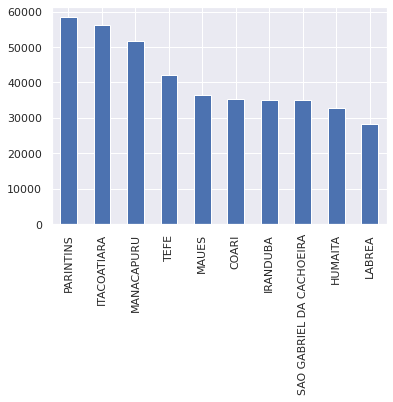

In [23]:
# Vacinados por Município (Top 10), exceto Manaus
vacinacao_AM.estabelecimento_municipio_nome.value_counts()[1:].head(10).plot(kind='bar');

In [24]:
# Performance da aplicação das vacinas em Manaus por dia
vacinacao_AM[vacinacao_AM.estabelecimento_municipio_nome == 'MANAUS'].groupby(['vacina_dataaplicacao_date']).agg({'paciente_id':'count'})

,paciente_id
vacina_dataaplicacao_date,
2021-01-19,671
2021-01-20,4925
2021-01-21,145
2021-01-22,645
2021-01-23,1013
...,...
2021-08-04,5627
2021-08-05,6475
2021-08-06,8306


In [25]:
# % por Grupo de atendimento
vacinacao_AM.vacina_grupoatendimento_nome.value_counts(normalize=True)

Pessoas de 18 a 64 anos                      0.480242
Ribeirinha                                   0.070884
Pessoas de 65 a 69 anos                      0.053981
Outros                                       0.048480
Povos indígenas em terras indígenas          0.046556
                                               ...   
Estudante                                    0.000005
Pessoal da Limpeza                           0.000005
Indivíduos Transplantados de Medula Óssea    0.000005
Ferroviário                                  0.000005
Metroviário                                  0.000002
Name: vacina_grupoatendimento_nome, Length: 92, dtype: float64

In [26]:
# Criando o mês da data de aplicação da vacina
vacinacao_AM['vacina_dataaplicacao_month'] = vacinacao_AM.vacina_dataaplicacao.dt.month

In [27]:
# Tipo de Vacina por Mês
vacinacao_AM.groupby(['vacina_dataaplicacao_month', 'vacina_fabricante_nome']).agg({'paciente_id': 'count'})

paciente_id
vacina_dataaplicacao_month vacina_fabricante_nome                       
1                          Butantan/Sinovac                         9582
                           FUNDACAO BUTANTAN                       52099
                           FUNDACAO OSWALDO CRUZ                    9565
                           MINISTERIO DA SAUDE                         6
                           SERUM INSTITUTE OF INDIA LTD             2800
...                                                                  ...
8                          Janssen-Cilag                             210
                           MINISTERIO DA SAUDE                      2012
                           SERUM INSTITUTE OF INDIA LTD              312
                           SINOVAC LIFE SCIENCE CO LTD              1497
                           University of Oxford/AstraZeneca        15994

[67 rows x 1 columns]

In [28]:
# % de vacinação por sexo
vacinacao_AM.paciente_enumsexobiologico.value_counts(normalize=True) 

F    0.528035
M    0.471965
Name: paciente_enumsexobiologico, dtype: float64

In [29]:
vacinacao_AM.drop_duplicates(inplace=True)

In [30]:
# Pacientes x doses
vacinacao_AM.groupby(['paciente_id', 'vacina_descricao_dose']).agg({'document_id': 'count'}).sort_values(by='document_id', ascending=False)


document_id
paciente_id                                        vacina_descricao_dose             
da72b5883d98f5413e002395ef043355660dfed9baa626c... 1ª Dose                          7
57a75d7d2ca092e937a2834c4d3a1646406f4bd3491fa2b... 1ª Dose                          4
2ea801079cf8553f6bca3c1130c4e593f2103a67359da50... 1ª Dose                          4
b91c1d311f5834e1716cfa208d8c4f83cf56c443e28d1f6... 1ª Dose                          4
2675829927e177080ecd60f343f12ea0a9690f8a7787319... 1ª Dose                          4
...                                                                               ...
55619cb5afd8de0264ab93da7810b7a1d19c191f25dcb3c... 1ª Dose                          1
                                                   2ª Dose                          1
55619ea3259cf810a3c79cbad7c1aa09099b93be56a0494... 1ª Dose                          1
5561a76aa17a6fcfa72d7867feefb7c1801ec8b19523c16... 1ª Dose                          1
fffffdc05eae3c2d6afb6d58cf8267066cdda69c82e3a5b... 2ª Dose                          1

[2513561 rows x 1 columns]

In [31]:
# Analisando um paciente Outlier´, pressupõe-se lançamentos errados e/ou lançados em sistemas diferentes que geraram duplicatas.
vacinacao_AM[vacinacao_AM.paciente_id == 'da72b5883d98f5413e002395ef043355660dfed9baa626c9ae1f4ae24559e8c0']

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_dataaplicacao_date,vacina_dataaplicacao_weekofyear,vacina_dataaplicacao_month
199943,aad50831-e283-4133-9b97-ce29a9831208-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37.0,1983-11-19,F,1.0,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,69440.0,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-02,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-02T14:58:05.000Z,16341,2021-02-02,5,2
898223,b7debb50-1e99-4c5d-a608-9709158bed9c-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37.0,1983-11-19,F,1.0,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,NaN,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-02,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-02T12:02:38.000Z,16341,2021-02-02,5,2
1506943,4f7fd3dc-b789-4705-977d-fc9e67727c4b-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37.0,1983-11-19,F,1.0,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,NaN,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-01,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-01T12:13:55.000Z,16341,2021-02-01,5,2
1713379,d16aa650-ddfa-4a73-a6c9-523f1528ba02-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37.0,1983-11-19,F,1.0,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,NaN,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-02,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-02T12:04:05.000Z,16341,2021-02-02,5,2
2108992,b6716b43-0622-43f1-893d-612be68e8a91-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37.0,1983-11-19,F,1.0,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,NaN,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-01,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-01T12:12:39.000Z,16341,2021-02-01,5,2
2133432,85714291-64e8-4ac4-bc4c-14c0a8bb7b0d-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37.0,1983-11-19,F,1.0,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,69440.0,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,0,NaN,NaN,NaN,20010028,SERUM INSTITUTE OF INDIA LTD,NaN,2021-01-21,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-02-20T01:31:51.000Z,18602,2021-01-21,3,1
2190540,9e966d15-d6af-4a54-8dd8-7fdc1a59a128-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37.0,1983-11-19,F,1.0,BRANCA,130010.0,10.0,ANORI,BRASIL,AM,69440.0,B,3539687,PREFEITURA MUNICIPAL DE ANORI,POSTO DE SAUDE FAUSTO GOMES DA ROCHA,130010,ANORI,AM,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,202010025,FUNDACAO BUTANTAN,Organizat

In [32]:
# Analisando outro paciente Outlier´, pressupõe-se lançamentos errados e/ou lançados em sistemas diferentes que geraram duplicatas.
vacinacao_AM[vacinacao_AM.paciente_id == '2ea801079cf8553f6bca3c1130c4e593f2103a67359da50ed7215e071f6d6617']

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_dataaplicacao_date,vacina_dataaplicacao_weekofyear,vacina_dataaplicacao_month
139552,38531401-2038-4573-8db2-d62b0e3d8d1f-i0b0,2ea801079cf8553f6bca3c1130c4e593f2103a67359da5...,48.0,1973-01-17,F,4.0,AMARELA,130260.0,10.0,MANAUS,BRASIL,AM,69600.0,B,6687113,PREFEITURA MUNICIPAL DE SAO PAULO DE OLIVENCA,UNIDADE BASICA DE SAUDE DE SAO JOAO,130390,SAO PAULO DE OLIVENCA,AM,926,Outros,9.0,Trabalhadores de Saúde,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-26,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-08T20:05:18.000Z,16341,2021-01-26,4,1
1157446,6557cb9b-6cd4-474d-9ff5-7ffde3c2df27-i0b0,2ea801079cf8553f6bca3c1130c4e593f2103a67359da5...,48.0,1973-01-17,F,4.0,AMARELA,130260.0,10.0,MANAUS,BRASIL,AM,69600.0,B,6687113,PREFEITURA MUNICIPAL DE SAO PAULO DE OLIVENCA,UNIDADE BASICA DE SAUDE DE SAO JOAO,130390,SAO PAULO DE OLIVENCA,AM,0,NaN,NaN,NaN,202010025,SERUM INSTITUTE OF INDIA LTD,NaN,2021-01-25,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-02-20T01:31:51.000Z,18602,2021-01-25,4,1
1177231,7f752f16-cddb-47d4-bb80-0a96d1c54cae-i0b0,2ea801079cf8553f6bca3c1130c4e593f2103a67359da5...,48.0,1973-01-17,F,4.0,AMARELA,130260.0,10.0,MANAUS,BRASIL,AM,69600.0,B,6687113,PREFEITURA MUNICIPAL DE SAO PAULO DE OLIVENCA,UNIDADE BASICA DE SAUDE DE SAO JOAO,130390,SAO PAULO DE OLIVENCA,AM,0,NaN,NaN,NaN,202010025,SERUM INSTITUTE OF INDIA LTD,NaN,2021-01-22,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-02-22T14:25:37.000Z,18602,2021-01-22,3,1
1187601,bad92df2-167c-47eb-96a8-06bbbe74ee71-i0b0,2ea801079cf8553f6bca3c1130c4e593f2103a67359da5...,48.0,1973-01-17,F,4.0,AMARELA,130260.0,10.0,MANAUS,BRASIL,AM,69600.0,B,6687113,PREFEITURA MUNICIPAL DE SAO PAULO DE OLIVENCA,UNIDADE BASICA DE SAUDE DE SAO JOAO,130390,SAO PAULO DE OLIVENCA,AM,0,NaN,NaN,NaN,202010025,SERUM INSTITUTE OF INDIA LTD,NaN,2021-01-24,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-02-20T01:31:51.000Z,18602,2021-01-24,3,1
1640875,a085c2de-2ef2-4d6e-9b4b-6e58ea1e0fa4-i0b0,2ea801079cf8553f6bca3c1130c4e593f2103a67359da5...,48.0,1973-01-17,F,4.0,AMARELA,130260.0,10.0,MANAUS,BRASIL,AM,69600.0,B,6687113,PREFEITURA MUNICIPAL DE SAO PAULO DE OLIVENCA,UNIDADE BASICA DE SAUDE DE SAO JOAO,130390,SAO PAULO DE OLIVENCA,AM,926,Outros,9.0,Trabalhadores de Saúde,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-08,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-08T20:52:38.000Z,16341,2021-03-08,10,3
